1.1 Как хорошо вы владеете python?

In [ ]:
7 - После перехода в ds фокус сместился на математику и ml теорию,
 так что начал уже забывать то, что редко используется

1.2 Насколько хорошо Вы знакомы с Google Sheets?

In [ ]:
6 - Владею на нормальном уровне.

2.1 Рекламная кампания

In [2]:
b = 40
b -= b * 0.5
b *= 0.2
print(40 - b)

36.0


2.2 пять идентичных рекламных

In [23]:
# Стоимость работы одной кампании
# 5 * x * 24 * 6 = 120
x_comp = 120 / 6 / 24 / 5
# будет равно дроби 1/6
# 9 * x_comp * 8 * x_days <= 216
x_days = 216 / 9 / 8
x_days * 6

18.0

2.3 Дизайнеры создали

In [25]:
res = 0
s = 200
s -= 80
s -= 60
# x + 3x = s
x = s/4
print(x)

15.0


2.4 Энн использует Instagram

In [27]:
import pandas as pd

columns = ['Name', 'Instagram', 'Facebook', 'Youtube']
df = pd.DataFrame([['Enn', 1, -1, 0],
                   ['John', 0, 1, 1],
                   ['Kate', -1, 0, 1],
                   ['Tom', 0, 1, -1]], columns=columns)
df
#Ответ Джон и Кейт

,Name,Instagram,Facebook,Youtube
0,Enn,1,-1,0
1,John,0,1,1
2,Kate,-1,0,1
3,Tom,0,1,-1


2.5 Средний итоговый балл

In [31]:
# (x)/4 = 78
# x = 78 * 4 = 312
#(312 + x)/5 = 80
x = 80 * 5 - 312
x

88

2.6 Заказанные в приложении товары

In [33]:
# t1 = 260 / 80 = 3.25
# t2 = 260 / 100 = 2.6
ans = (3.25 - 2.6) * 60
# Если решать в дробях то будет 39
print(39)

39


3 Предобработка

In [1]:
import pandas as pd
import re

def convert_google_sheet_url(url):
    # Regular expression to match and capture the necessary part of the URL
    pattern = r'https://docs\.google\.com/spreadsheets/d/([a-zA-Z0-9-_]+)(/edit#gid=(\d+)|/edit.*)?'

    # Replace function to construct the new URL for CSV export
    # If gid is present in the URL, it includes it in the export URL, otherwise, it's omitted
    replacement = lambda m: f'https://docs.google.com/spreadsheets/d/{m.group(1)}/export?' + (f'gid={m.group(3)}&' if m.group(3) else '') + 'format=csv'

    # Replace using regex
    new_url = re.sub(pattern, replacement, url)

    return new_url


In [2]:
url = 'https://docs.google.com/spreadsheets/d/1t2Bl9Jc0JCWOaeFgADJ2bVdoLdjDTWno/edit#gid=1841568595'

new_url = convert_google_sheet_url(url)

df = pd.read_csv(new_url)


In [3]:
df['Unnamed: 5'].unique()
df.drop('Unnamed: 5', inplace=True, axis=1)

In [4]:
df['status'].unique()

array(['Май 2021', 'ВНУТРЕННИЙ', 'ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'Июнь 2021',
       'Июль 2021', 'Август 2021', 'В РАБОТЕ', 'Сентябрь 2021',
       'Октябрь 2021', 'НА ПОДПИСАНИИ'], dtype=object)

In [5]:
pd.options.mode.chained_assignment = None
date_column = df['status'].copy()
date_stamp = 0

for ind, row in enumerate(date_column):
  if '20' in row:
    date_stamp = row
  date_column[ind] = date_stamp

date_column.unique()


array(['Май 2021', 'Июнь 2021', 'Июль 2021', 'Август 2021',
       'Сентябрь 2021', 'Октябрь 2021'], dtype=object)

In [6]:
df['date'] = date_column
df.head()

,client_id,sum,status,sale,new/current,document,receiving_date,date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,Май 2021
1,6.0,"11 693,70",ВНУТРЕННИЙ,-,-,-,-,Май 2021
2,14.0,"5 452,70",ОПЛАЧЕНО,Петрова,новая,оригинал,26.07.21,Май 2021
3,15.0,"13 991,70",ОПЛАЧЕНО,Иванов,текущая,оригинал,08.06.21,Май 2021
4,16.0,"719,7",ОПЛАЧЕНО,Иванов,текущая,оригинал,08.06.21,Май 2021


In [7]:
df = df[df['client_id'].notna()]
df.head()

,client_id,sum,status,sale,new/current,document,receiving_date,date
1,6.0,"11 693,70",ВНУТРЕННИЙ,-,-,-,-,Май 2021
2,14.0,"5 452,70",ОПЛАЧЕНО,Петрова,новая,оригинал,26.07.21,Май 2021
3,15.0,"13 991,70",ОПЛАЧЕНО,Иванов,текущая,оригинал,08.06.21,Май 2021
4,16.0,"719,7",ОПЛАЧЕНО,Иванов,текущая,оригинал,08.06.21,Май 2021
5,18.0,"4 253,70",ОПЛАЧЕНО,Иванов,текущая,оригинал,07.07.21,Май 2021


In [8]:
df['sum'] = df["sum"].apply(lambda x: float(''.join(x.replace(',', '.').split())))

.

.

3.1 Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных
средств которых не просрочен.

In [9]:
df.query('status != "ПРОСРОЧЕНО" & date == "Июль 2021"').groupby(by='date').aggregate({'sum':'sum'})

,sum
date,
Июль 2021,859896.47


3.2 Как изменялась выручка компании за рассматриваемый период?

<Axes: xlabel='date', ylabel='sum'>

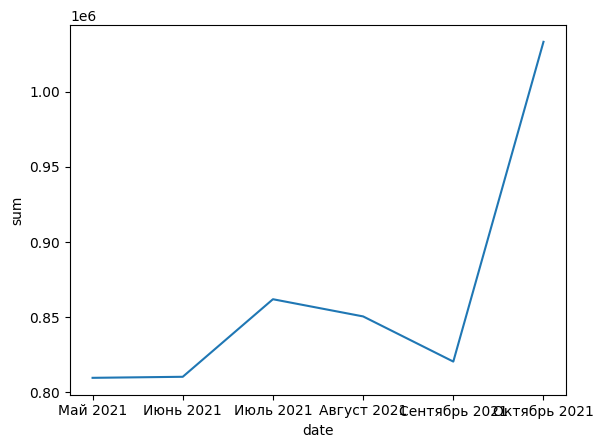

In [10]:
import seaborn as sns

inde = {'Май 2021':1, 'Июнь 2021':2, 'Июль 2021':3, 'Август 2021':4, 'Сентябрь 2021':5, 'Октябрь 2021':6}
temp = df.groupby(by='date').aggregate({'sum':'sum'})
temp = temp.assign(f = [inde[i] for i in temp.index]).sort_values('f').drop('f', axis=1)

sns.lineplot(data=temp ,y=temp['sum'], x=temp.index)

3.3 Кто из менеджеров привлек для компании больше всего денежных средств в
сентябре 2021?

In [11]:
temp = df.query('date == "Сентябрь 2021"').groupby(by='sale').aggregate({'sum':'sum'})
temp.columns = ['summary']
temp.sort_values(by='summary', ascending=False).iloc[0]

summary    221525.7
Name: Смирнов, dtype: float64

3.4 Какой тип сделок (новая/текущая) был преобладающим в октябре 2021? Ответ 'текущая'

In [12]:
df.query('date == "Сентябрь 2021"').groupby(by='new/current').aggregate({'sum':'count'})

,sum
new/current,
новая,14
текущая,95


3.5 Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [13]:
temp = df.query('date == "Май 2021" & receiving_date.notnull()')

temp = temp.loc[temp['receiving_date'].str.contains("06.21")]
temp.shape[0]

77

Задание

In [14]:
from numpy import nan

df.head()

,client_id,sum,status,sale,new/current,document,receiving_date,date
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,Май 2021
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,26.07.21,Май 2021
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,08.06.21,Май 2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,08.06.21,Май 2021
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,07.07.21,Май 2021


In [15]:
def data_convertor(x):
  if x is not nan:
    if '.' in x:
      date = x.split('.')
      date[2] = '20' + date[2]
      return '.'.join(date)
    else:
      return nan
  return x

In [16]:
df['receiving_date'] = df['receiving_date'].apply(data_convertor)

In [17]:
df['receiving_date'] = pd.to_datetime(df['receiving_date'], format='%d.%m.%Y')

In [18]:
df['receiving_date']

1            NaT
2     2021-07-26
3     2021-06-08
4     2021-06-08
5     2021-07-07
         ...    
725   2021-11-15
726          NaT
727          NaT
728   2021-11-08
729   2021-11-15
Name: receiving_date, Length: 724, dtype: datetime64[ns]

In [250]:
df.head()

,client_id,sum,status,sale,new/current,document,receiving_date,date
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,NaT,Май 2021
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,Май 2021
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,Май 2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,Май 2021
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,Май 2021


In [21]:
df['receiving_date'].iloc[2].month

6

In [130]:
month = {'Январь' : '01', 'Февраль':'02', 'Март':'03', 'Апрель':'04', 'Май':'05', 'Июнь':'06', 'Июль':'07', 'Август':'08', 'Сентябрь':'09', 'Октябрь':'10', 'Ноябрь':'11', 'Декабрь':'12'}
df['date'] = df['date'].apply(lambda x: x.split())
df['date'] = df['date'].apply(lambda x: ':'.join([month[x[0]], x[1]]))

,client_id,sum,status,sale,new_current,document,receiving_date,date
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,NaT,05:2021
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,05:2021
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,05:2021
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,05:2021
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,05:2021


In [131]:
df['date'] = pd.to_datetime(df['date'], format='%m:%Y')
df.head()

,client_id,sum,status,sale,new_current,document,receiving_date,date
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,NaT,2021-05-01
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,2021-05-01
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,2021-05-01
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,2021-05-01
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,2021-05-01


In [135]:
temp = df.query('date < "2021-07-01"')
temp.date.unique()

<DatetimeArray>
['2021-05-01 00:00:00', '2021-06-01 00:00:00']
Length: 2, dtype: datetime64[ns]

In [136]:
temp.columns = ['client_id', 'sum', 'status', 'sale', 'new_current', 'document',
       'receiving_date', 'date']

temp1 = temp.query('receiving_date >= "2021-07-01" & status == "ОПЛАЧЕНО" & new_current	== "новая"')
temp1.head()

,client_id,sum,status,sale,new_current,document,receiving_date,date
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,2021-05-01
43,83.0,8763.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-13,2021-05-01
44,84.0,3558.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-13,2021-05-01
45,85.0,9083.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-13,2021-05-01
125,281.0,4488.7,ОПЛАЧЕНО,Селиванов,новая,оригинал,2021-07-16,2021-05-01


In [137]:
temp_sales1 = temp1.groupby(by=['sale', 'status']).aggregate({'sum':'sum', 'client_id':'count'})
temp_sales1['sum'] = temp_sales1['sum'] * 0.07
temp_sales1

,,sum,client_id
sale,status,,
Васильев,ОПЛАЧЕНО,187.509,1
Петрова,ОПЛАЧЕНО,2877.448,2
Селиванов,ОПЛАЧЕНО,4336.913,7
Смирнов,ОПЛАЧЕНО,213.759,1
Филимонова,ОПЛАЧЕНО,727.468,2


In [138]:
def calculate(x):
  if x[1] <= 1e4:
    x[1] *= 0.03
  else:
    x[1] *= 0.05
  return x

temp2 = df.query('receiving_date >= "2021-07-01" & status != "ПРОСРОЧЕНО" & new_current	== "текущая"')

temp2 = temp2.loc[:,['sale', 'sum']]
temp2 = temp2.apply(calculate, axis=1)

In [139]:
temp_sales2 = temp2.groupby(by='sale').aggregate({'sum':'sum'})
temp_sales2

,sum
sale,
Андреев,19049.4743
Васильев,3120.6625
Иванов,21100.4890
Кузнецова,13358.4221
Петрова,24167.7292
Селиванов,2232.0950
Смирнов,26842.7130
Соколов,3456.4000
Филимонова,4718.8365


In [140]:
res = pd.merge(temp_sales2, temp_sales1, on='sale', how="outer", indicator=True)
res = res.fillna(0, axis=1)
res

,sum_x,sum_y,client_id,_merge
sale,,,,
Андреев,19049.4743,0,0,left_only
Васильев,3120.6625,187.509,1.0,both
Иванов,21100.489,0,0,left_only
Кузнецова,13358.4221,0,0,left_only
Петрова,24167.7292,2877.448,2.0,both
Селиванов,2232.095,4336.913,7.0,both
Смирнов,26842.713,213.759,1.0,both
Соколов,3456.4,0,0,left_only
Филимонова,4718.8365,727.468,2.0,both


In [141]:
res['sum'] = res['sum_x'] + res['sum_y']
res['sum']

sale
Андреев       19049.4743
Васильев       3308.1715
Иванов         21100.489
Кузнецова     13358.4221
Петрова       27045.1772
Селиванов       6569.008
Смирнов        27056.472
Соколов           3456.4
Филимонова     5446.3045
Name: sum, dtype: object